<a href="https://colab.research.google.com/github/tuankhoin/MCEN90048-EEG-Grasp-and-Lift-Detection/blob/main/code_ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/tuankhoin/MCEN90048-EEG-Grasp-and-Lift-Detection/blob/main/code.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import os
import json
import zipfile
from pathlib import Path

try:
  # See if you are running on colab
  from google.colab import drive 

  # Download the dataset
  api_token = {"username":"tuankhoinguyen","key":"6b992b229c6a4d8f6a8b30d1c101507d"}
  kaggle_path = Path('/root/.kaggle')
  os.makedirs(kaggle_path, exist_ok=True)

  with open (kaggle_path/'kaggle.json', 'w') as handl:
      json.dump(api_token,handl)
  os.chmod(kaggle_path/'kaggle.json', 600)  
  !kaggle competitions download -c grasp-and-lift-eeg-detection

  # Unzipping datasets
  for z in ['grasp-and-lift-eeg-detection','train','test']:
    print(f'Unzipping {z}.zip')
    with zipfile.ZipFile(f'{z}.zip', 'r') as zip_ref:
      zip_ref.extractall('')
  print('All good!')
  # Removing the zip files to save up VM space
  !rm *.zip
except:
  pass

 98% 1.00G/1.02G [00:10<00:00, 107MB/s]
100% 1.02G/1.02G [00:10<00:00, 100MB/s]


In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

X, y = make_multilabel_classification(random_state=0)
inner_clf = LogisticRegression(solver="liblinear", random_state=0)
clf = MultiOutputClassifier(inner_clf).fit(X, y)
y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])

# Returns AUC score of each individual label. Here, y is the binary-encoded true 
# label value with shape (n_samples, n_outputs) (where n_outputs is the number 
# of types of binary-encoded labels) and y_score is the predicted 
# confidence/probability scores (same shape as y).
print(roc_auc_score(y, y_score, average=None))
print(roc_auc_score(y, y_score, average='macro'))
print(roc_auc_score(y, y_score, average='micro'))
print(roc_auc_score(y, y_score, average='weighted'))
print(y_score.shape)
print(type(y_score))

[0.82664884 0.86034414 0.94181818 0.8502652  0.94809095]
0.8854334613594667
0.8955479452054795
0.8859880294284318
(100, 5)
<class 'numpy.ndarray'>


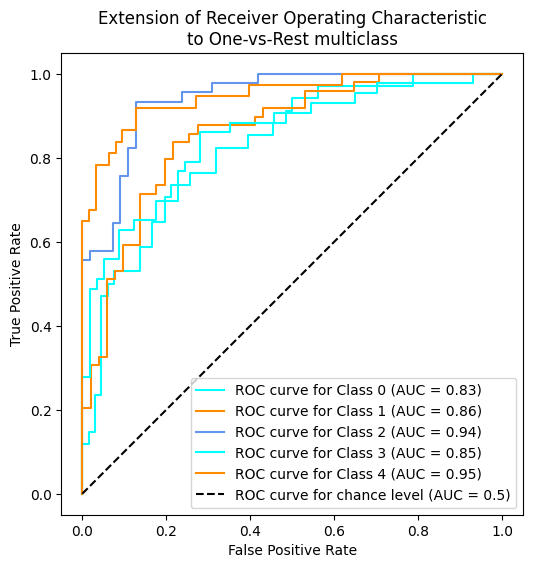

In [8]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

n_classes = 5

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for Class {class_id}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()